In [1]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

from src.commons.parse_utils import parse_list_column
import pandas as pd
from octis.dataset.dataset import Dataset
from top2vec import Top2Vec

from src.commons.plots import plot_topics_trends
from src.top2vec.evaluator import Top2VecMultiEvaluator

In [2]:
csv_file = "../../data/arxiv_processed.csv"
data = pd.read_csv(csv_file, sep=";", converters={'Processed Summary': parse_list_column})
documents = data['Summary'].tolist()

In [3]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder("../../data/octis")

In [4]:
model_doc2vec = Top2Vec.load('models/doc2vec_unprocessed')
model_doc2vec_ngram = Top2Vec.load('models/doc2vec_ngram_unprocessed')
model_allenai = Top2Vec.load('models/allenai_unprocessed')
model_allenai_ngram = Top2Vec.load('models/allenai_ngram_unprocessed')

In [5]:
models = dict()
models['doc2vec'] = model_doc2vec
models['doc2vec + ngram'] = model_doc2vec_ngram
models['allenai specter'] = model_allenai
models['allenai specter + ngram'] = model_allenai_ngram

In [8]:
# allenai_specter = SentenceTransformer('sentence-transformers/allenai-specter')
# allenai_embedding_model = allenai_specter.encode
#
# model_configs = dict()
# alenai_ngram = dict()
# alenai_ngram['embedding_model'] = allenai_embedding_model
# alenai_ngram['ngram_vocab'] = True
# allenai = dict()
# allenai['embedding_model'] = allenai_embedding_model
# allenai['ngram_vocab'] = False
# model_configs['allenai specter + ngram'] = alenai_ngram
# model_configs['allenai specter'] = allenai

In [9]:
top2vec_evaluator = Top2VecMultiEvaluator(documents=documents, models=models, octis_dataset=dataset)

In [10]:
top2vec_evaluator.evaluate()

2024-12-03 16:39:19,811 - Top2VecMultiEvaluator - INFO - Evaluating model metrics: doc2vec
2024-12-03 16:40:45,748 - Top2VecMultiEvaluator - INFO - Evaluating model metrics: doc2vec + ngram
2024-12-03 16:41:06,743 - Top2VecMultiEvaluator - INFO - Evaluating model metrics: allenai specter
2024-12-03 16:41:52,068 - Top2VecMultiEvaluator - INFO - Evaluating model metrics: allenai specter + ngram


,doc2vec,doc2vec + ngram,allenai specter,allenai specter + ngram
UMass,-5.826029,NaN,-8.546690,NaN
NPMI,0.062686,NaN,-0.129399,NaN
C_V,0.607373,NaN,0.380617,NaN
Topic Diversity,0.679554,0.925795,0.734694,0.923404
Inverted RBO,0.998039,0.999668,0.986451,0.997715
Pairwise Jaccard,0.001936,0.000324,0.010923,0.001962
KL Uniform,3.182074,3.204777,2.371862,2.346869
KL Vacuous,2.770204,2.767167,2.638577,2.641207
KL Background,0.016313,0.019244,0.011016,0.010783


In [11]:
for model_name, model in top2vec_evaluator.models.items():
    print(model_name)
    print(model.get_num_topics())

doc2vec
269
doc2vec + ngram
283
allenai specter
49
allenai specter + ngram
47


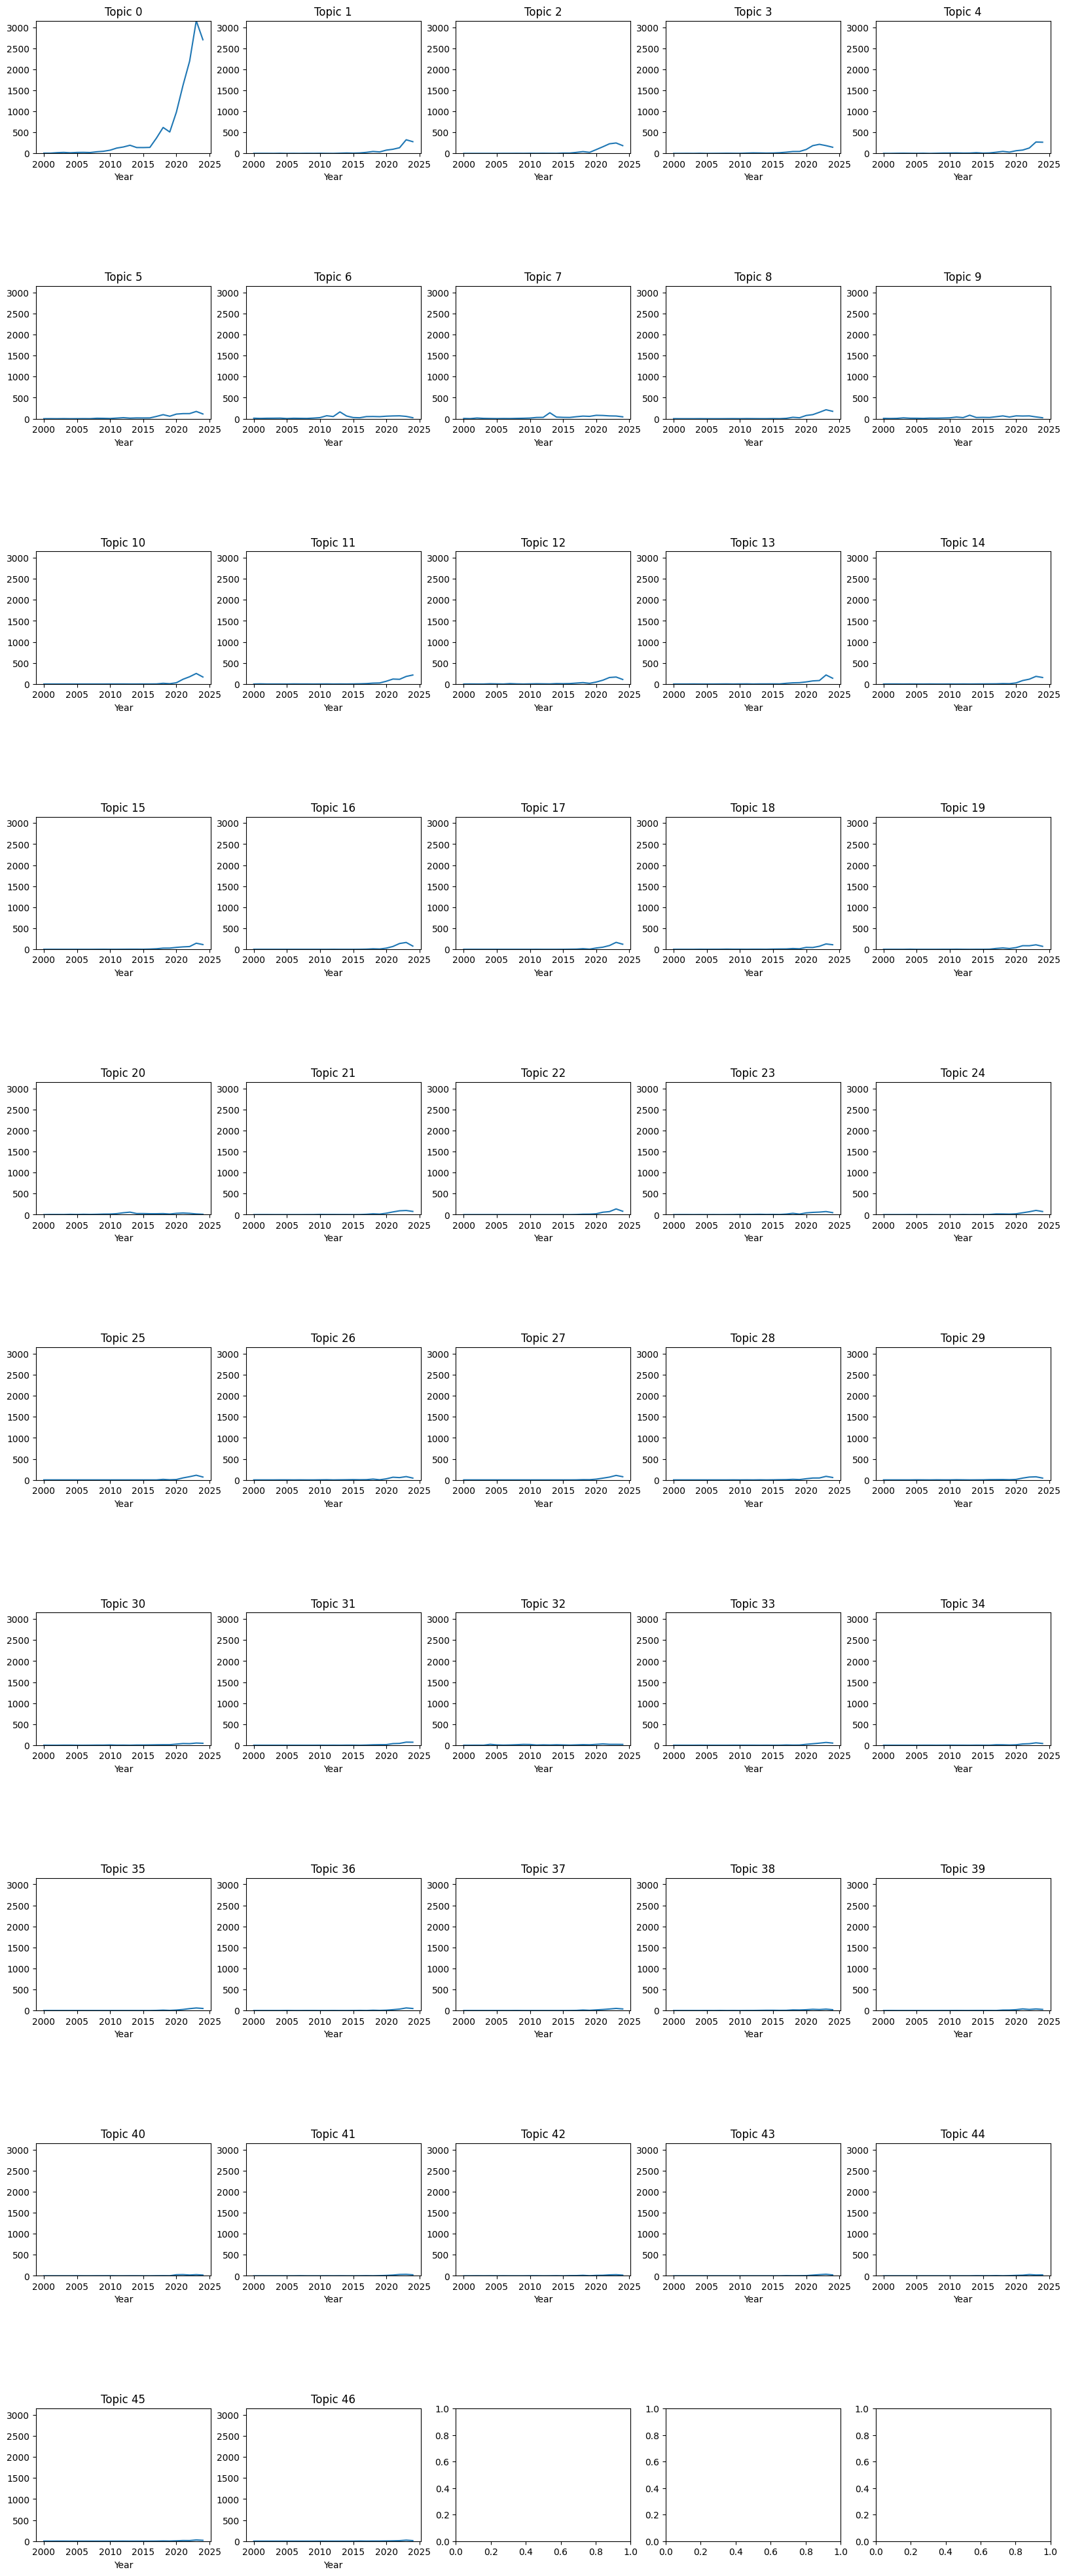

In [12]:
plot_topics_trends(data, top2vec_evaluator.models['allenai specter + ngram'].doc_top)

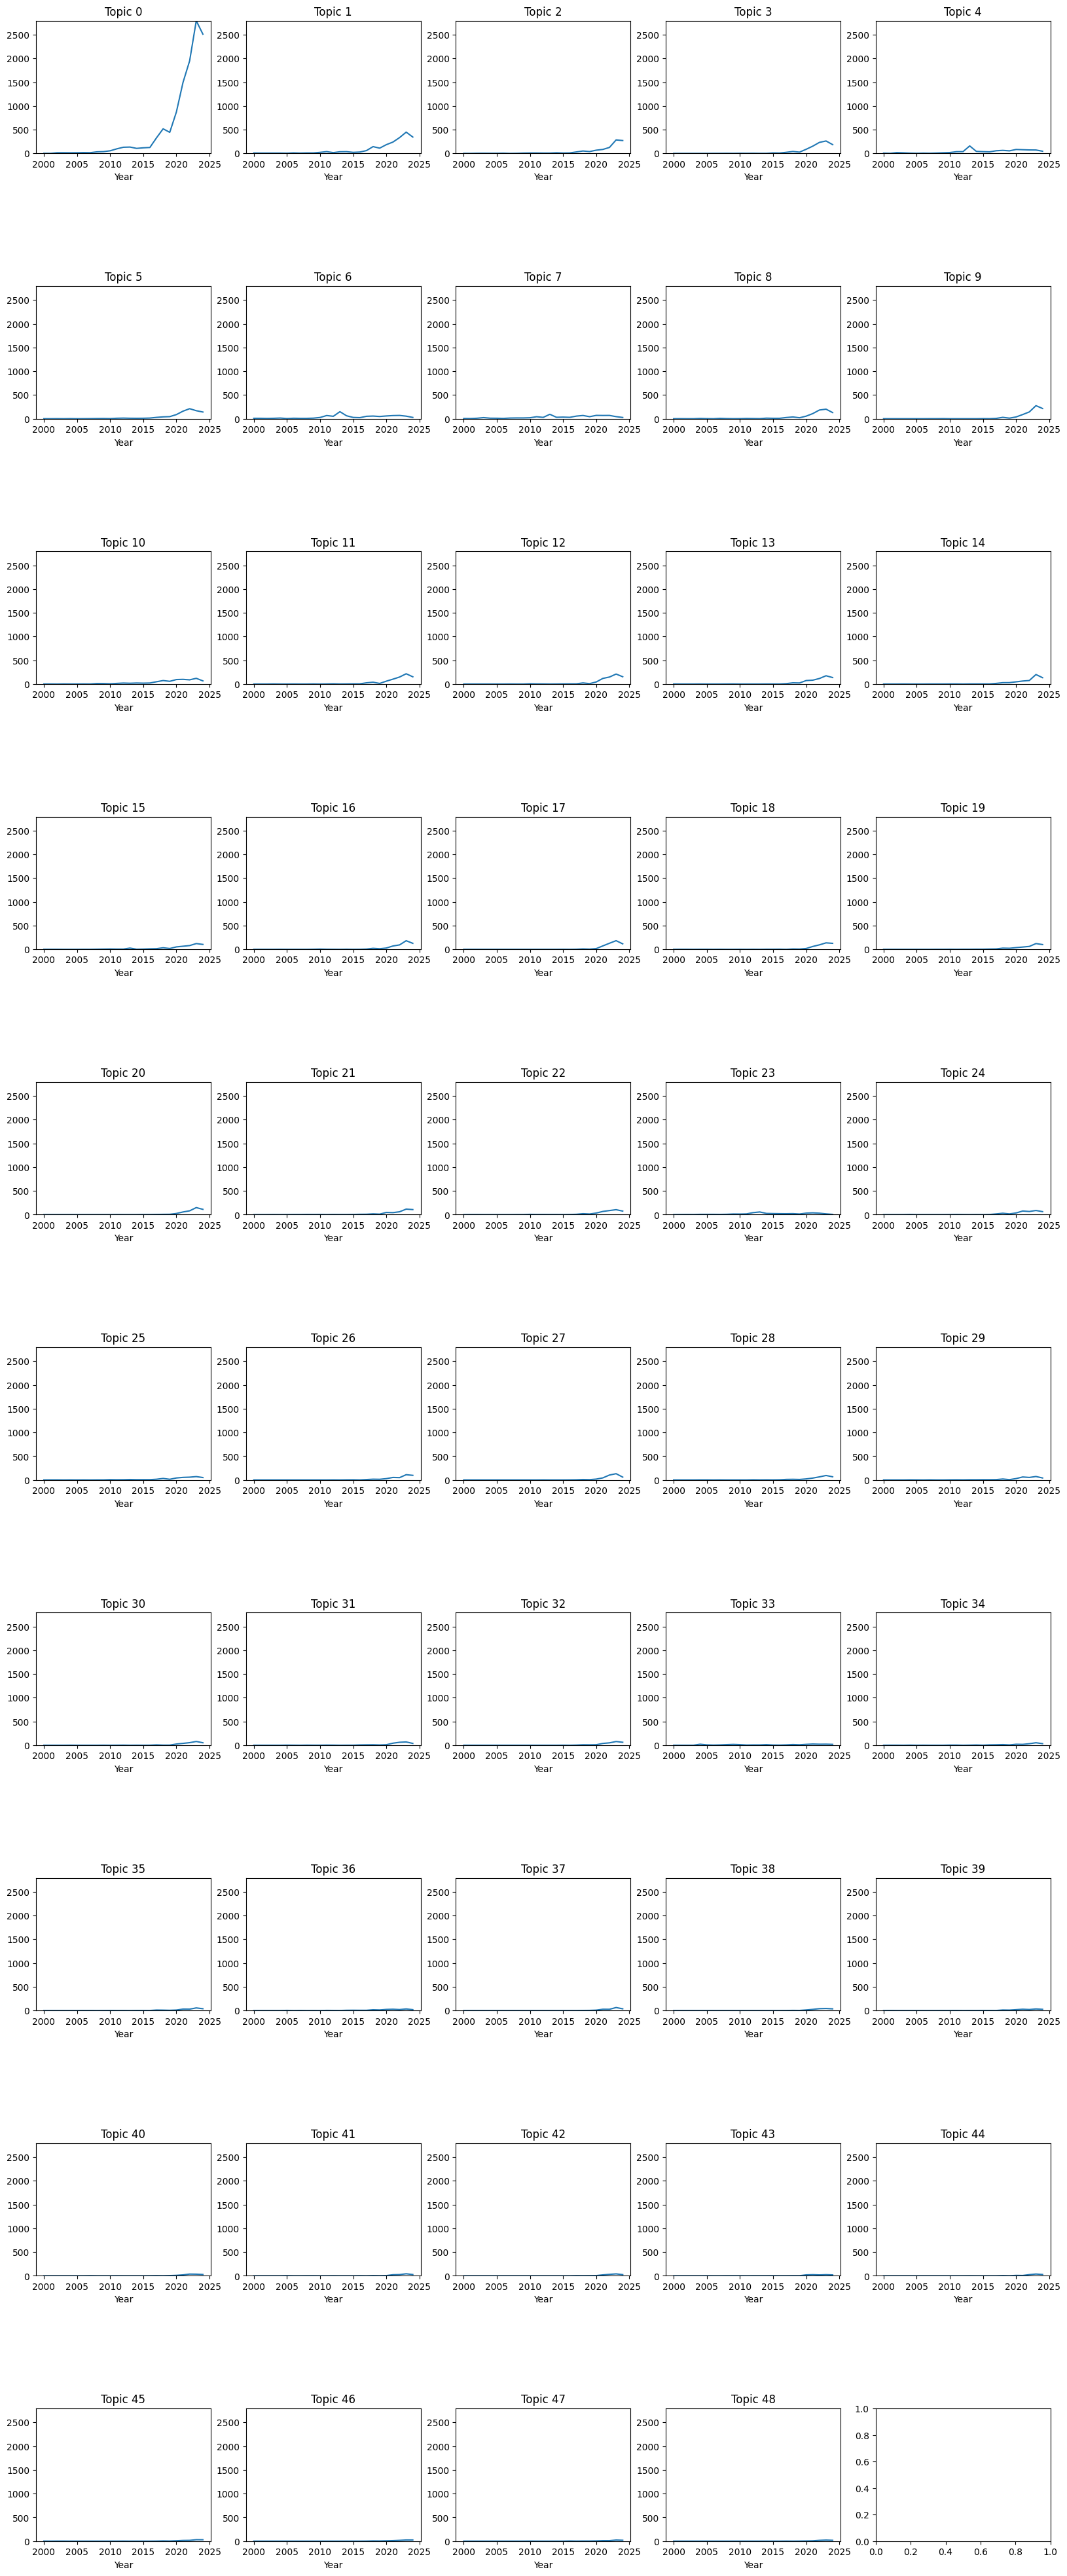

In [13]:
plot_topics_trends(data, top2vec_evaluator.models['allenai specter'].doc_top)

## Domain stopwords

In [ ]:
top2vec_evaluator.models['allenai specter'].get_topics()[0][0]

array(['parse', 'generate', 'existing', 'generating', 'deploy', 'the',
       'structured', 'developed', 'built', 'improved', 'encouraging',
       'modify', 'professional', 'prevalent', 'completing', 'implements',
       'proposing', 'removing', 'modifying', 'extracted', 'gathered',
       'degraded', 'recent', 'customized', 'categorized', 'captured',
       'enrich', 'mining', 'own', 'compositions', 'numerous', 'many',
       'communities', 'generated', 'adopted', 'proposed', 'raising',
       'sparql', 'famous', 'incomplete', 'rich', 'resultant', 'big',
       'completed', 'filling', 'enriched', 'employs', 'underline',
       'whole', 'richer'], dtype='<U15')

In [18]:
top2vec_evaluator.models['allenai specter + ngram'].get_topics()[0][0]

array(['instance wise', 'tree ast', 'parse', 'understanding nlu',
       'multi tasking', 'search nas', 'generate', 'existing',
       'structured pruning', 'non empty', 'nested ner', 'generating',
       'the', 'arnold networks', 'steiner tree', 'ne reasoner', 'deploy',
       'structured', 'structured dnnf', 'graph coarsening',
       'unstructured pruning', 'built', 'developed', 'networks nns',
       'improved', 'this shortcoming', 'framework named', 'network rnn',
       'network snn', 'non overlapping', 'winograd schema', 'prevalent',
       'networks cnn', 'finetune paradigm', 'nexp complete',
       'encouraging', 'modify', 'query rewriting', 'extracted',
       'implements', 'completing', 'removing', 'gathered', 'professional',
       'networks rnns', 'non deterministic', 'np complete',
       'headline generation', 'graph completion', 'modifying'],
      dtype='<U29')

## Allenai specter without domain stopwords

In [6]:
# read words from file, in each line is separate word
with open('../../data/scientific_words', 'r') as f:
    domain_stopwords = [line.strip() for line in f.readlines()]

In [8]:
documents_without_stopwords = data['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in domain_stopwords])).tolist()

In [24]:
documents_without_stopwords

['We revisit issue of connections between two leading formalisms in nonmonotonic reasoning: autoepistemic logic and default logic. For each logic we develop a comprehensive semantic framework based on notion of a belief pair. The set of all belief pairs together with so called knowledge ordering forms a complete lattice. For each logic, we introduce several semantics by means of fixpoints of operators on lattice of belief pairs. Our results elucidate an underlying isomorphism of respective semantic constructions. In particular, we show that interpretation of defaults as modal formulas by Konolige allows us to represent all semantics for default logic in terms of corresponding semantics for autoepistemic logic. Thus, our results conclusively establish that default logic can indeed be viewed as a fragment of autoepistemic logic. However, as we also demonstrate, semantics of Moore and Reiter are given by different operators and occupy different locations in their corresponding families of

In [10]:
allenai_specter = SentenceTransformer('sentence-transformers/allenai-specter')
allenai_embedding_model = allenai_specter.encode

model_configs = dict()
# alenai_ngram = dict()
# alenai_ngram['embedding_model'] = allenai_embedding_model
# alenai_ngram['ngram_vocab'] = True
allenai = dict()
allenai['embedding_model'] = allenai_embedding_model
allenai['ngram_vocab'] = False
# model_configs['allenai specter + ngram'] = alenai_ngram
model_configs['allenai specter'] = allenai

In [11]:
top2vec_evaluator = Top2VecMultiEvaluator(documents=documents_without_stopwords, models=dict(), octis_dataset=dataset, model_configs=model_configs)

In [12]:
top2vec_evaluator.evaluate()

2024-12-04 17:34:20,015 - Top2VecMultiEvaluator - INFO - Training model with embedding: allenai specter
2024-12-04 17:34:20,034 - top2vec - INFO - Pre-processing documents for training
/home/mstrzezon/miniconda3/envs/adm/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-12-04 17:34:30,371 - top2vec - INFO - Creating joint document/word embedding
2024-12-04 18:02:15,703 - top2vec - INFO - Creating lower dimension embedding of documents
2024-12-04 18:02:41,299 - top2vec - INFO - Finding dense areas of documents
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The cu

,allenai specter
UMass,-8.472874
NPMI,-0.117691
C_V,0.394291
Topic Diversity,0.719403
Inverted RBO,0.990957
Pairwise Jaccard,0.007573
KL Uniform,2.467487
KL Vacuous,2.645816
KL Background,0.010449


In [18]:
for model_name, model in top2vec_evaluator.models.items():
    print(model_name)
    print(model.get_num_topics())

allenai specter
67


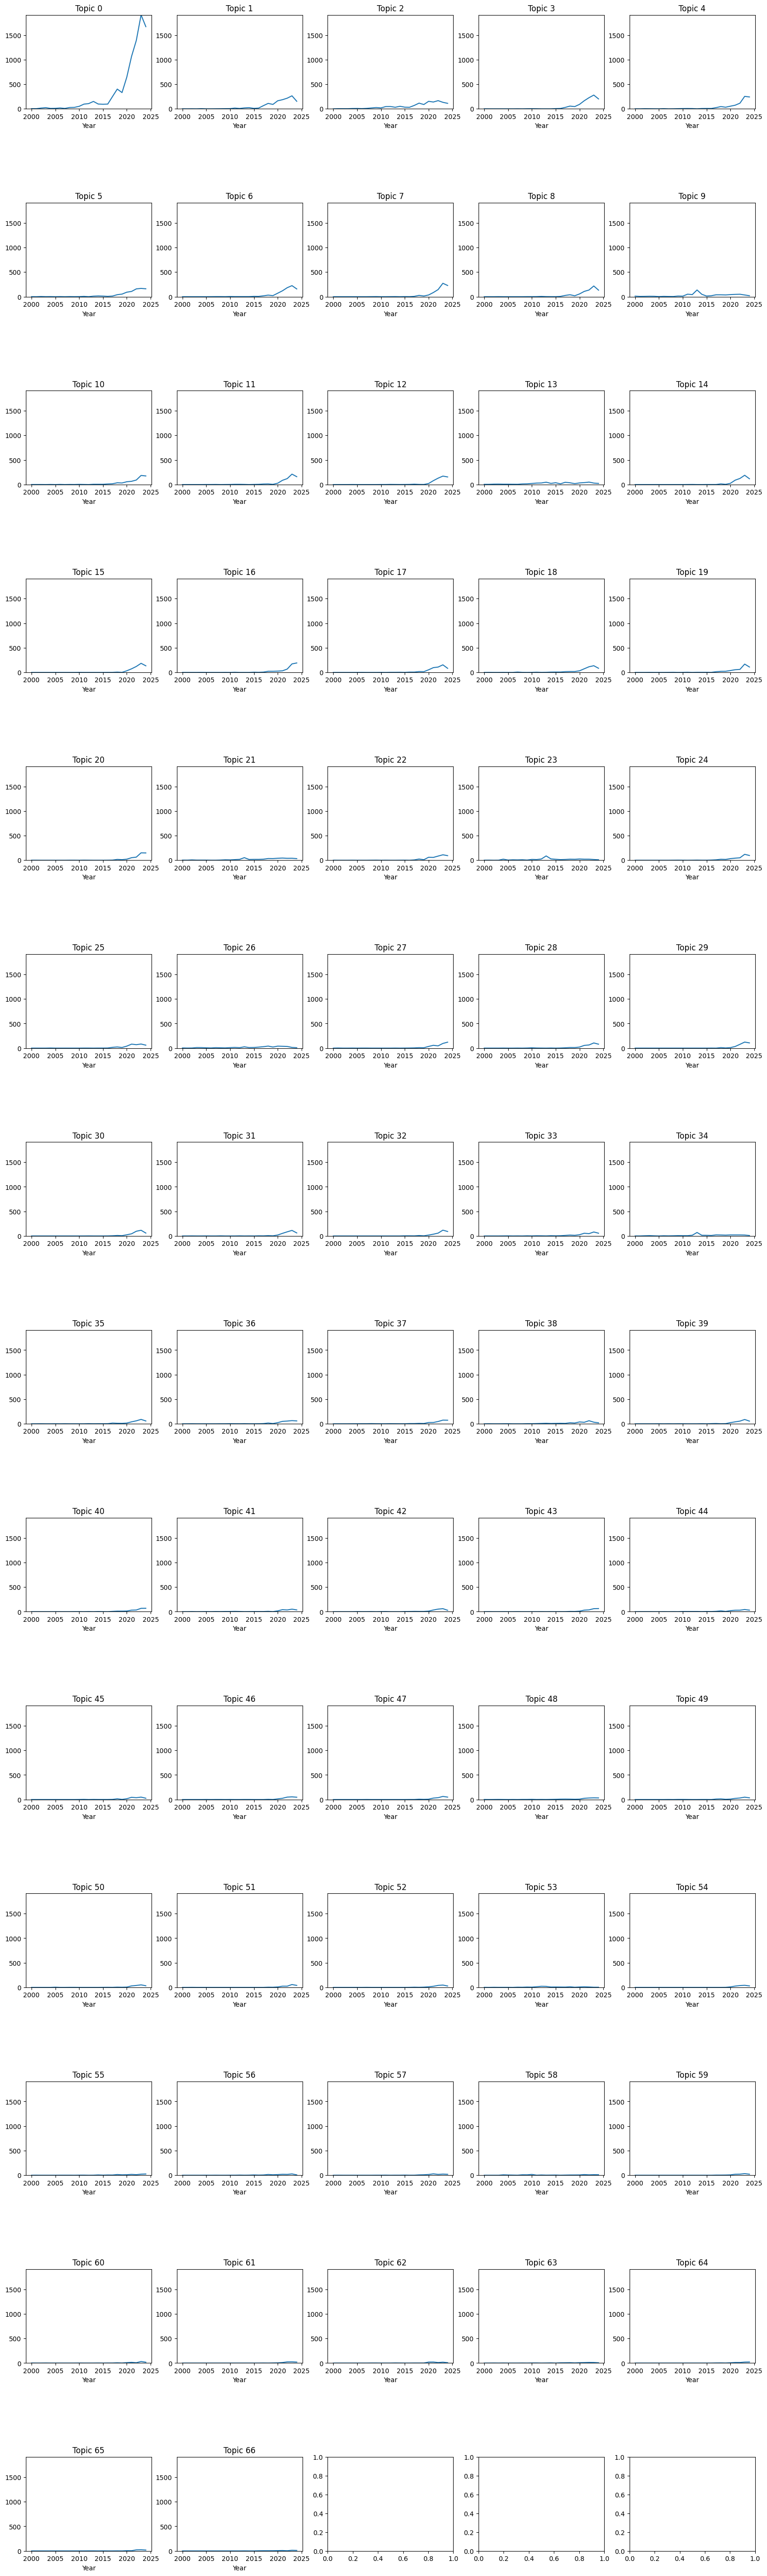

In [19]:
plot_topics_trends(data, top2vec_evaluator.models['allenai specter'].doc_top)

In [15]:
topic_sizes, topic_nums = top2vec_evaluator.models['allenai specter'].get_topic_sizes()

<BarContainer object of 67 artists>

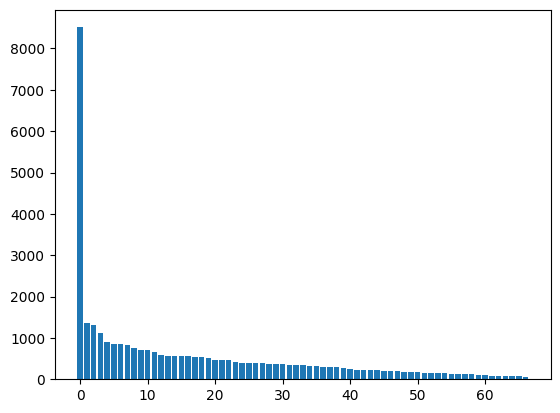

In [16]:
plt.bar(topic_nums, topic_sizes)

In [20]:
topics_words, _, _ = top2vec_evaluator.models['allenai specter'].get_topics()
topics_words

array([['existing', 'generate', 'generating', ..., 'removes', 'adding',
        'since'],
       ['robots', 'robot', 'robotics', ..., 'sensors', 'atomic', 'force'],
       ['metaheuristics', 'metaheuristic', 'subproblems', ...,
        'guaranteeing', 'residential', 'deployed'],
       ...,
       ['disease', 'deep', 'myopic', ..., 'deepfakes', 'highlighted',
        'art'],
       ['gesture', 'gestures', 'spoken', ..., 'alignments', 'book',
        'correspondences'],
       ['job', 'jobs', 'wikidata', ..., 'genre', 'generating', 'https']],
      dtype='<U15')